# Fermi-Hubbard Hamiltonian
In this notebook we check the correct implementation of the FH Hamiltonian with NN terms, by comparing the energy and the number of particles with the qiskit implementation.

In [1]:
import numpy as np

# for qiskit implementation
from mera_hubbard import create_model_qiskit, solve_ground_state_qiskit, solve_ground_state, solve_ground_state_half_filling, FH_Hamiltonian_NN, FH_Hamiltonian_NN_half_filling


# for quimb implementation
import quimb as qu

/Users/bai/local/src/MERA-Hubbard/.venv/lib/python3.12/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [2]:
# definition of the lattice and parameters
lattice_type = [4]

t1 = 1. # hopping term (energy scale) - minus sign added in the code!!!
t2 = 1.5 # next-nearest-neighbor hopping - minus sign added in the code!!!
U = 4. # on-site interaction - change U to change regime (U/t is what counts) -
mu = 0. # chemical potential term


#######################################
model_dim = len(lattice_type)
if model_dim == 1:
    num_sites_per_col = 1
    num_sites_per_row = lattice_type[0]
else:
    num_sites_per_col = lattice_type[0]
    num_sites_per_row = lattice_type[1]

num_sites = num_sites_per_col * num_sites_per_row
num_qubits = num_sites * 2

Qiskit implementation

Adjacency matrix:
[[0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]]


Hamiltonian:
Fermionic Operator
number spin orbitals=8, number terms=24
  (-1+0j) * ( +_0 -_2 )
+ (1+0j) * ( -_0 +_2 )
+ (-1.5+0j) * ( +_0 -_4 )
+ (1.5+0j) * ( -_0 +_4 )
+ (-1+0j) * ( +_2 -_4 )
+ (1+0j) * ( -_2 +_4 )
+ (-1.5+0j) * ( +_2 -_6 )
+ (1.5+0j) * ( -_2 +_6 )
+ (-1+0j) * ( +_4 -_6 )
+ (1+0j) * ( -_4 +_6 )
+ (-1+0j) * ( +_1 -_3 )
+ (1+0j) * ( -_1 +_3 )
+ (-1.5+0j) * ( +_1 -_5 )
+ (1.5+0j) * ( -_1 +_5 )
+ (-1+0j) * ( +_3 -_5 )
+ (1+0j) * ( -_3 +_5 )
+ (-1.5+0j) * ( +_3 -_7 )
+ (1.5+0j) * ( -_3 +_7 )
+ (-1+0j) * ( +_5 -_7 )
+ (1+0j) * ( -_5 +_7 )
+ (4+0j) * ( +_0 -_0 +_1 -_1 )
+ (4+0j) * ( +_2 -_2 +_3 -_3 )
+ (4+0j) * ( +_4 -_4 +_5 -_5 )
+ (4+0j) * ( +_6 -_6 +_7 -_7 )
Energy gs =  -3.527166638308325
Number of particles = 4.0
Magnetization = 0.0


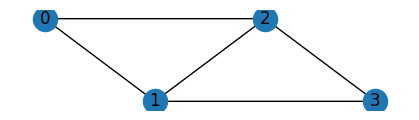

In [3]:
# the chemical potential value is implemented in the code (it can be changed to be at half-filling (look at the H written with particle-hole symmetry)), 
# however the solution of the ground state is implemented to find the lowest energy state at half-filling among the excited states, LET IT EQUAL TO 0.!!!
model, ham = create_model_qiskit(lattice_type, t1, U, mu, t2, draw=True)

en_qiskit, num_part_qiskit, eigenstate = solve_ground_state_qiskit(model, True)

Quimb implementation

In [4]:
ham, sH = FH_Hamiltonian_NN(num_sites, t1, t2, U)
ham.show()
en_quimb, num_part_quimb, gs_quimb = solve_ground_state_half_filling(num_sites, ham, sH)

/Users/bai/local/src/MERA-Hubbard/.venv/lib/python3.12/site-packages/quimb/experimental/operatorbuilder/operatorbuilder.py:1431: NumbaTypeSafetyWarning: unsafe cast from int64 to undefined. Precision may be lost.
  ci = bitmap[bi]


SparseOperatorBuilder(nsites=8, nterms=24, locality=3))
+ - . . . . . .  -1.0
- + . . . . . .  -1.0
. . . . + - . .  -1.0
. . . . - + . .  -1.0
. + - . . . . .  -1.0
. - + . . . . .  -1.0
. . . . . + - .  -1.0
. . . . . - + .  -1.0
. . + - . . . .  -1.0
. . - + . . . .  -1.0
. . . . . . + -  -1.0
. . . . . . - +  -1.0
+ z - . . . . .  -1.5
- z + . . . . .  -1.5
. . . . + z - .  -1.5
. . . . - z + .  -1.5
. + z - . . . .  -1.5
. - z + . . . .  -1.5
. . . . . + z -  -1.5
. . . . . - z +  -1.5
n . . . n . . .  +4.0
. n . . . n . .  +4.0
. . n . . . n .  +4.0
. . . n . . . n  +4.0
energy =  -3.527166638308322
number of particles =  4.0


In [5]:
assert  np.round(en_qiskit,0)==np.round(en_quimb,0), "The energy is not equal!!!"
assert num_part_qiskit==num_part_quimb, "The number of particles is not equal!!!"

Check the implementation of the quimb implementation of the FH Hamiltonian at half-filling\
(the ground state $k=1$ needs to have $N/2$ particles)

In [6]:
# # check that holds for cases with t2=0
# h, s_h = FH_Hamiltonian_NN(num_sites, t1, t2, U, mu=-U/2)
# e, n, _ = solve_ground_state(num_sites, h, s_h)

In [7]:
ham_hf, sham_hf = FH_Hamiltonian_NN_half_filling(num_sites, t1, t2, U)
en_hf, n_hf, v_hf_quimb = solve_ground_state(num_sites, ham_hf, sham_hf)

Reference ED at half-filling:
energy =  -3.527166638308322
number of particles =  4.0


New Hamiltonian at half-filling:
chemical potential at half-filling =  -2.442
energy =  -3.5271666383083264
number of particles =  4.0


In [8]:
assert np.isclose(en_hf, en_quimb, atol=1.e-5), "The chemical potential is not correct!"

Check on the state - fidelity

In [9]:
from qiskit.quantum_info import state_fidelity, Statevector
psi = Statevector(v_hf_quimb)
state_fidelity(psi, eigenstate)

0.07847310215320753